## **Identifying Fraudulent Transactions:**  

### Objective the Project:
- The Objective of this project is to build a Predictive model to determine whether a given transaction will be fraudulent or not.
- Handle time-based anomalies (e.g., multi-swipes or reversals within short intervals).


**Business goal:**
- Maximize fraud detection (recall) without too many false positives (precision trade-off).
- Identifying fraudulent transaction is crucial for Financial and Banking domains to reduce financial loss and to improve customer satisfaction.

### **Importing Neccessary libraries**

- I am importing the jsonlines library because the data is in text format, specifically structured as JSONLines (where each line is a valid JSON object).

- The jsonlines library allows me to efficiently read and process this type of data line by line, which is particularly useful for large datasets.

In [1]:
!pip install jsonlines


In [ ]:
!pip install xgboost


This script loads line-delimited JSON data from a .txt file (each line is a JSON object), handles invalid lines gracefully, and converts the cleaned data into a structured pandas DataFrame for analysis. (Useful when Processing large datasets like logs, transactions)

In [3]:
import jsonlines
import pandas as pd
from datetime import datetime
import sys
print(sys.executable)

data = []

with jsonlines.open("/content/sample_data/transactions data.txt") as reader:
  for obj in reader.iter(skip_invalid=True): # Used Skip_invalid as True to ignore any error related to extra characters after valis JSON Object
    data.append(obj)

data = pd.DataFrame(data)
data

/usr/bin/python3


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.00,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.00,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.00,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162310,998209824,998209824,250.0,250.00,2016-07-29T03:13:24,42.92,KFC #960686,US,US,02,...,,0.00,,,,True,,,False,False
162311,998209824,998209824,250.0,207.08,2016-07-30T19:13:50,28.66,Texas Gas #641063,US,US,02,...,,42.92,,,,True,,,False,False
162312,998209824,998209824,250.0,203.42,2016-08-06T23:33:10,118.40,McDonalds #908298,US,US,05,...,,46.58,,,,True,,,False,False
162313,998209824,998209824,250.0,250.00,2016-08-13T00:31:47,30.14,Texas Gas #641063,US,US,02,...,,0.00,,,,True,,,False,False


## **Exploring the data set:**

### **1.Exploratory Data Analysis Phase:**  

In [4]:
print(data.info())  # Print a summary of the DataFrame (columns, types, etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162315 entries, 0 to 162314
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             162315 non-null  object 
 1   customerId                162315 non-null  object 
 2   creditLimit               162315 non-null  float64
 3   availableMoney            162315 non-null  float64
 4   transactionDateTime       162315 non-null  object 
 5   transactionAmount         162315 non-null  float64
 6   merchantName              162315 non-null  object 
 7   acqCountry                162315 non-null  object 
 8   merchantCountryCode       162315 non-null  object 
 9   posEntryMode              162315 non-null  object 
 10  posConditionCode          162315 non-null  object 
 11  merchantCategoryCode      162315 non-null  object 
 12  currentExpDate            162315 non-null  object 
 13  accountOpenDate           162315 non-null  o

Transaction dataset has total of **289230** entries, with total of **29** coulmns.

It has object, float, datetime and boolean data types which indicates dataset has mix of different set values.    

#### Missing Values

The dataset was checked for missing values using the isnull().sum() method, which returns the count of null entries for each column. The output confirms that:

There are no missing values in any column.
Each column has complete data across all 786,363 records.

In [5]:
# Check remaining missing values
missing_summary = data.isnull().sum()
print(missing_summary)

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64


In [6]:
# Count unique values in each column
unique_counts = data.nunique()

# Display the result
print("Unique value count per column:")
print(unique_counts)

Unique value count per column:
accountNumber                 1105
customerId                    1105
creditLimit                     10
availableMoney              136289
transactionDateTime         161864
transactionAmount            42180
merchantName                  2383
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate                783
dateOfLastAddressChange       1053
cardCVV                        744
enteredCVV                     874
cardLast4Digits               1473
transactionType                  4
echoBuffer                       1
currentBalance              133402
merchantCity                     1
merchantState                    1
merchantZip                      1
cardPresent                      2
posOnPremises                    1
recurringAuthInd                 1
expirationDateKeyInMatch

In [7]:
# Data Structure and Summary
print("Number of records:", data.shape[0])
print("Number of fields per record:", data.shape[1])

Number of records: 162315
Number of fields per record: 29


In [8]:
# Show unique values for each column (first 10 values only to keep output readable)
for col in data.columns:
    print(f"\nColumn: {col}")
    print(data[col].unique()[:10])  # Shows only first 10 unique values



Column: accountNumber
['737265056' '830329091' '574788567' '924729945' '984504651' '114896048'
 '482277829' '239577603' '863358589' '711536931']

Column: customerId
['737265056' '830329091' '574788567' '924729945' '984504651' '114896048'
 '482277829' '239577603' '863358589' '711536931']

Column: creditLimit
[ 5000.  2500. 50000. 15000. 10000.   250.   500.  1000.  7500. 20000.]

Column: availableMoney
[5000.   4990.63 4959.25 4918.5  4877.75 2500.   2469.92 2428.67 2304.46
 2108.39]

Column: transactionDateTime
['2016-08-13T14:27:32' '2016-10-11T05:05:54' '2016-11-08T09:18:39'
 '2016-12-10T02:14:50' '2016-03-24T21:04:46' '2016-04-19T16:24:27'
 '2016-05-21T14:50:35' '2016-06-03T00:31:21' '2016-06-10T01:21:46'
 '2016-07-11T10:47:16']

Column: transactionAmount
[ 98.55  74.51   7.47  71.18  30.76  57.28   9.37 523.67 164.37 160.18]

Column: merchantName
['Uber' 'AMC #191138' 'Play Store' 'Tim Hortons #947751'
 'In-N-Out #422833' 'Krispy Kreme #685312' 'Shake Shack #968081'
 'Burger King 

Below, I've Compared  the two columns AccountNumber and CustomerId element-wise across all rows.
Returns True if they are exactly the same (including order, values, and data types).

Since the columns are identical, keeping both is redundant.
Removes customerId to avoid duplication, reduce memory usage, and improve dataset clarity.

In [9]:
# Display the first few rows of customerId and accountNumber columns
print("First few rows of customerId and accountNumber:")
print(data[['customerId', 'accountNumber']].head())

# Check if the columns are identical
are_identical = data['customerId'].equals(data['accountNumber'])
print(f"Are 'customerId' and 'accountNumber' identical? {are_identical}")
data[['customerId', 'accountNumber']].tail()

data = data.drop(columns=['customerId'])

First few rows of customerId and accountNumber:
  customerId accountNumber
0  737265056     737265056
1  737265056     737265056
2  737265056     737265056
3  737265056     737265056
4  830329091     830329091
Are 'customerId' and 'accountNumber' identical? True


After verifying that the customerId and accountNumber columns contained identical values, I dropped the customerId column to eliminate redundancy.  

**Several columns were found to contain only empty strings and whitespaces across all rows (e.g., echoBuffer, merchantState, merchantZip). These columns were removed as they offer no analytical value. Columns with partial missing data (e.g., acqCountry, posEntryMode) will be handled separately by imputation or row removal based on their importance in modeling.**

In [10]:
empty_counts = (data == '') | (data.applymap(lambda x: isinstance(x, str) and x.strip() == ''))
empty_counts_sum = empty_counts.sum()
print(empty_counts_sum[empty_counts_sum > 0])  # Only show columns with empty strings

<ipython-input-10-41f2c6d3267f>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_counts = (data == '') | (data.applymap(lambda x: isinstance(x, str) and x.strip() == ''))


acqCountry                934
merchantCountryCode       165
posEntryMode              869
posConditionCode           79
transactionType           146
echoBuffer             162315
merchantCity           162315
merchantState          162315
merchantZip            162315
posOnPremises          162315
recurringAuthInd       162315
dtype: int64


In [11]:
cols_to_drop = [
    'echoBuffer', 'merchantCity', 'merchantState',
    'merchantZip', 'posOnPremises', 'posConditionCode',  'recurringAuthInd'
]
data = data.drop(columns=cols_to_drop)
data

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,merchantCategoryCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,rideshare,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,entertainment,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,mobileapps,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,mobileapps,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,fastfood,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162310,998209824,250.0,250.00,2016-07-29T03:13:24,42.92,KFC #960686,US,US,02,fastfood,...,2003-04-05,2003-04-05,769,769,968,PURCHASE,0.00,True,False,False
162311,998209824,250.0,207.08,2016-07-30T19:13:50,28.66,Texas Gas #641063,US,US,02,fuel,...,2003-04-05,2003-04-05,769,769,968,PURCHASE,42.92,True,False,False
162312,998209824,250.0,203.42,2016-08-06T23:33:10,118.40,McDonalds #908298,US,US,05,fastfood,...,2003-04-05,2003-04-05,769,769,968,REVERSAL,46.58,True,False,False
162313,998209824,250.0,250.00,2016-08-13T00:31:47,30.14,Texas Gas #641063,US,US,02,fuel,...,2003-04-05,2003-04-05,769,769,968,PURCHASE,0.00,True,False,False


In [12]:
# Separate categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()

# Count them
print(f"Number of categorical columns: {len(categorical_cols)}")
print(f"Categorical columns: {categorical_cols}\n")

print(f"Number of numerical columns: {len(numerical_cols)}")
print(f"Numerical columns: {numerical_cols}")


Number of categorical columns: 14
Categorical columns: ['accountNumber', 'transactionDateTime', 'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'transactionType']

Number of numerical columns: 4
Numerical columns: ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']


In [19]:
data_chiSquare = data.copy()

In [20]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd

categorical_cols = ['accountNumber', 'transactionDateTime', 'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'transactionType']

# Step 1: Fill NA if any
data_chiSquare[categorical_cols] = data_chiSquare[categorical_cols].fillna('Unknown')

# Step 2: Label Encode all categorical variables
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_chiSquare[col + '_enc'] = le.fit_transform(data_chiSquare[col])
    le_dict[col] = le  # Save encoders if needed

# Step 3: Chi-square test
X = data_chiSquare[[col + '_enc' for col in categorical_cols]]
y = data_chiSquare['isFraud']

chi_scores, p_values = chi2(X, y)

# Step 4: Display results
chi2_results = pd.DataFrame({
    'Feature': categorical_cols,
    'Chi2_Score': chi_scores,
    'P_Value': p_values
}).sort_values(by='P_Value')

print("📊 Chi-Square Test Results:")
print(chi2_results)


📊 Chi-Square Test Results:
                    Feature     Chi2_Score        P_Value
1       transactionDateTime  162273.004674   0.000000e+00
2              merchantName   86370.421729   0.000000e+00
10                  cardCVV    1541.548572   0.000000e+00
9   dateOfLastAddressChange    3456.908186   0.000000e+00
12          cardLast4Digits   10531.292023   0.000000e+00
11               enteredCVV    1864.988564   0.000000e+00
6      merchantCategoryCode     716.651826  7.156742e-158
8           accountOpenDate     177.075025   2.109062e-40
0             accountNumber      39.030665   4.172006e-10
7            currentExpDate      33.979113   5.570689e-09
5              posEntryMode       9.062518   2.609024e-03
3                acqCountry       0.883863   3.471459e-01
4       merchantCountryCode       0.483667   4.867660e-01
13          transactionType       0.317252   5.732641e-01


Columns such as PosEntryMode, CurrentExpDate, TransactionType, AcqCountry, and MerchantCountryCode exhibit low Chi-Square statistics and high p-values, indicating a lack of statistical significance in distinguishing between fraudulent and non-fraudulent transactions. As a result, these features can be safely excluded from further analysis.

In contrast, variables like MerchantName, TransactionDateTime, MerchantCategoryCode, AccountNumber, CardLast4Digits, EnteredCVV, CardCVV, AccountOpenDate, DateOfLastChangeOfAddress, and CurrentExpDate demonstrate high Chi-Square values and low p-values, suggesting a strong relationship with the target variable (fraud). These features are thus retained for potential use in model development.

To further validate the significance of the retained features, an additional analysis was conducted by calculating the average fraud rate for each category within these variables. This approach helps reinforce their predictive power and supports their inclusion in the final modeling pipeline.

In [23]:
df_cleaned = data.copy()

In [24]:

# Drop columns from df and create a new copy without them
columns_to_drop = ['posEntryMode', 'currentExpDate', 'transactionType', 'acqCountry', 'merchantCountryCode']

df_cleaned = df_cleaned.drop(columns=columns_to_drop)

In [25]:
df_cleaned

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,merchantCategoryCode,accountOpenDate,dateOfLastAddressChange,cardCVV,...,merchantCountryCode_enc,posEntryMode_enc,merchantCategoryCode_enc,currentExpDate_enc,accountOpenDate_enc,dateOfLastAddressChange_enc,cardCVV_enc,enteredCVV_enc,cardLast4Digits_enc,transactionType_enc
0,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,rideshare,2015-03-14,2015-03-14,414,...,4,1,17,73,571,571,267,327,141,2
1,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,entertainment,2015-03-14,2015-03-14,486,...,4,3,3,18,571,571,325,394,1104,2
2,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,mobileapps,2015-03-14,2015-03-14,486,...,4,3,12,103,571,571,325,394,1104,2
3,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,mobileapps,2015-03-14,2015-03-14,486,...,4,3,12,103,571,571,325,394,1104,2
4,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,fastfood,2015-08-06,2015-08-06,885,...,4,1,4,134,671,670,650,769,354,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162310,998209824,250.0,250.00,2016-07-29T03:13:24,42.92,KFC #960686,fastfood,2003-04-05,2003-04-05,769,...,4,1,4,94,0,0,559,663,1433,2
162311,998209824,250.0,207.08,2016-07-30T19:13:50,28.66,Texas Gas #641063,fuel,2003-04-05,2003-04-05,769,...,4,1,7,45,0,0,559,663,1433,2
162312,998209824,250.0,203.42,2016-08-06T23:33:10,118.40,McDonalds #908298,fastfood,2003-04-05,2003-04-05,769,...,4,2,4,107,0,0,559,663,1433,3
162313,998209824,250.0,250.00,2016-08-13T00:31:47,30.14,Texas Gas #641063,fuel,2003-04-05,2003-04-05,769,...,4,1,7,45,0,0,559,663,1433,2


In [ ]:
# List of categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Fraud rate per category
for col in categorical_cols:
    print(f"\nMean Fraud Rate by '{col}':")
    print(data.groupby(col)['isFraud'].mean().sort_values(ascending=False))



Mean Fraud Rate by 'accountNumber':
accountNumber
717666470    0.200000
863358589    0.102083
119877862    0.100000
726180479    0.050000
414020710    0.040000
               ...   
935981871    0.000000
940765768    0.000000
939875268    0.000000
941783034    0.000000
988172671    0.000000
Name: isFraud, Length: 111, dtype: float64

Mean Fraud Rate by 'transactionDateTime':
transactionDateTime
2016-07-05T20:16:56    1.0
2016-09-08T16:14:40    1.0
2016-10-27T18:18:40    1.0
2016-09-08T15:51:39    1.0
2016-03-08T23:24:43    1.0
                      ... 
2016-05-09T09:10:06    0.0
2016-05-09T09:42:07    0.0
2016-05-09T09:42:53    0.0
2016-05-09T10:13:05    0.0
2016-05-09T04:28:38    0.0
Name: isFraud, Length: 13529, dtype: float64

Mean Fraud Rate by 'merchantName':
merchantName
KFC #113520                1.0
West End Beauty #240693    1.0
West End Beauty #442869    1.0
West End Beauty #02340     1.0
West End Beauty #72256     1.0
                          ... 
Hyatt House #107859     


*Account level fraud*

Some accounts have high mean fraud rates (up to 20%) — strong fraud indicators. (717666470 has fraud rate of 2.0%)
Accounts with recent address changes or very old address change dates may signal fraud risk.

*Merchant level fraud*

Personall Care has very high fraud — this category is disproportionately targeted by fraudsters with 14.2%
Furniture with 2.6%	Above average — possibly high-ticket items attract fraud.
Followed by hotel, airlines and online retail, Moderately risky — common targets due to higher value with 1.6% of fraud rate.
CANADA Seems to have higher fraud rates with 2.5%

*transactionDateTime*

Has 100% fraud rate, can drive day, hour and mid-nights features to check if they are fraud indicators.

*Credit Card Related Patterns*

Some values are associated with high fraud.
CVVs like 975, 217, 126 have very high fraud rates.
These may indicate guessed or known leaked values.
Cards expiring in 2023–2032 show some fraud.

Hence, Account Numbers, Address, Merchant details, Date and time, and Card information like (Entered CVV/Card CVV and Last4digits of card ) are strong indicators which suggest that we should deep dive into these variables to further examine our study on fraudulent transactions and what areas shall be flagged to save financial losses and customer dissatisfaction.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance,accountNumber_enc,transactionDateTime_enc,merchantName_enc,acqCountry_enc,merchantCountryCode_enc,posEntryMode_enc,merchantCategoryCode_enc,currentExpDate_enc,accountOpenDate_enc,dateOfLastAddressChange_enc,cardCVV_enc,enteredCVV_enc,cardLast4Digits_enc,transactionType_enc
count,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000
mean,9844.195670,5715.874993,135.668005,4128.320677,64.136555,6763.763910,1173.457696,3.955294,3.975024,2.153329,9.871204,81.961871,51.801670,75.960245,66.955221,103.273480,84.022981,1.998596
std,13086.090995,8831.614165,146.311075,8019.414592,36.236339,3905.492773,647.853371,0.372728,0.247297,0.937952,5.108015,47.142684,29.835337,39.699152,43.343390,63.100583,47.216433,0.228247
min,250.000000,-745.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,522.120000,33.350000,289.900000,34.000000,3382.000000,535.000000,4.000000,4.000000,1.000000,4.000000,42.000000,27.000000,37.000000,26.000000,44.000000,45.000000,2.000000
50%,5000.000000,2267.030000,85.850000,1252.480000,71.000000,6764.000000,1369.000000,4.000000,4.000000,2.000000,12.000000,81.000000,51.000000,78.000000,58.000000,90.000000,79.000000,2.000000
75%,15000.000000,7350.760000,189.730000,4015.600000,96.000000,10146.000000,1811.000000,4.000000,4.000000,3.000000,14.000000,123.000000,80.000000,113.000000,100.000000,152.000000,122.000000,2.000000
max,50000.000000,50000.000000,1171.010000,47489.500000,110.000000,13528.000000,1826.000000,4.000000,4.000000,5.000000,18.000000,164.000000,104.000000,142.000000,156.000000,230.000000,167.000000,3.000000


### From the above statistical summary we can see infer below pointers:

Analyzing the dataset revealed several key insights into user behavior and financial patterns as stated below.

*Credit limit*

Wide range from 250 to 50,000 with a very high standard deviation → Indicates highly diverse customer profiles (low vs. premium accounts).
Could be important: fraudsters may target higher limits for bigger potential gain.

*AvailableMoney*

Has negative values, suggesting over-limit spending → might be a strong fraud signal.

Wide distribution: some customers have full limit available, others are in overdraft.
Highly correlated to both creditLimit and currentBalance.

*CurrentBalance*

Huge spread: 0 to 47,489
Important to see if fraud is more likely when balances are low or high (e.g., near limit).

This tells us fraud is less likely in very small-value transactions and has higher chances to occur in large amounts.

**Lets identify ranges where fraud rate increases for these four important coulmns**

In [ ]:


# Define your columns of interest
cols_to_check = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']

# Set the step size for thresholds (adjust for granularity)
threshold_steps = 10  # percentiles from 10% to 90%

# Loop over each column
for col in cols_to_check:
    print(f"\n📊 Fraud Rate Analysis for: {col}")
    print("-" * 40)

    # Get min and max thresholds using percentiles
    for percentile in range(10, 100, threshold_steps):
        threshold = data[col].quantile(percentile / 100)

        fraud_rate_above = data[data[col] > threshold]['isFraud'].mean()
        fraud_rate_below = data[data[col] <= threshold]['isFraud'].mean()

        print(f"Threshold > {percentile}% ({threshold:.2f}) → Fraud Rate: {fraud_rate_above:.4f}")



📊 Fraud Rate Analysis for: creditLimit
----------------------------------------
Threshold > 10% (1000.00) → Fraud Rate: 0.0166
Threshold > 20% (2500.00) → Fraud Rate: 0.0168
Threshold > 30% (5000.00) → Fraud Rate: 0.0146
Threshold > 40% (5000.00) → Fraud Rate: 0.0146
Threshold > 50% (5000.00) → Fraud Rate: 0.0146
Threshold > 60% (7500.00) → Fraud Rate: 0.0159
Threshold > 70% (10000.00) → Fraud Rate: 0.0162
Threshold > 80% (15000.00) → Fraud Rate: 0.0220
Threshold > 90% (20000.00) → Fraud Rate: 0.0310

📊 Fraud Rate Analysis for: availableMoney
----------------------------------------
Threshold > 10% (359.06) → Fraud Rate: 0.0165
Threshold > 20% (776.63) → Fraud Rate: 0.0163
Threshold > 30% (1288.20) → Fraud Rate: 0.0162
Threshold > 40% (1910.40) → Fraud Rate: 0.0160
Threshold > 50% (2604.80) → Fraud Rate: 0.0160
Threshold > 60% (3638.61) → Fraud Rate: 0.0159
Threshold > 70% (4897.43) → Fraud Rate: 0.0156
Threshold > 80% (7459.82) → Fraud Rate: 0.0168
Threshold > 90% (13532.83) → Fraud 

Fraud rate increases noticeably above the 80th percentile (15,000) and peaks above the 90th percentile (20,000) at 3.1%.

Strong positive correlation between amount and fraud rate.
From 1.75% → 3.87% as amount increases.

Interpretation:
“Fraudsters often initiate transactions of higher amounts. This feature is a strong predictor and should definitely be included in fraud models.”

Based on fraud rate trends, I chose to retain features like transactionAmount and creditLimit because they show strong signals for fraud. availableMoney and currentBalance are kept for potential interaction effects.

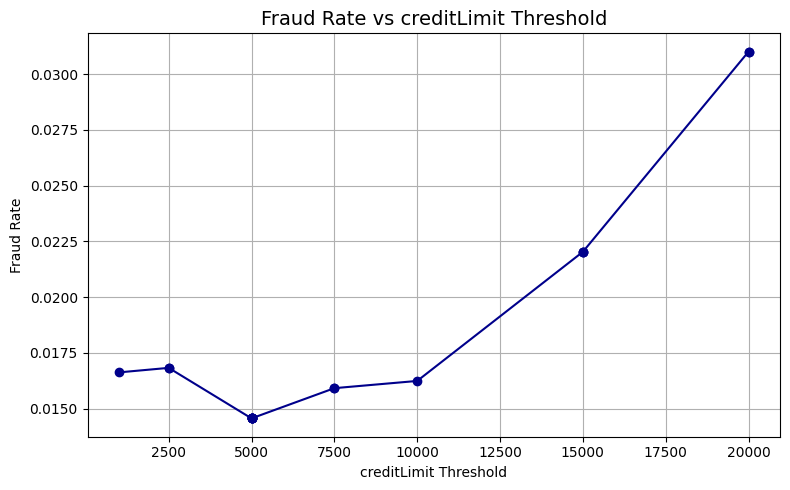

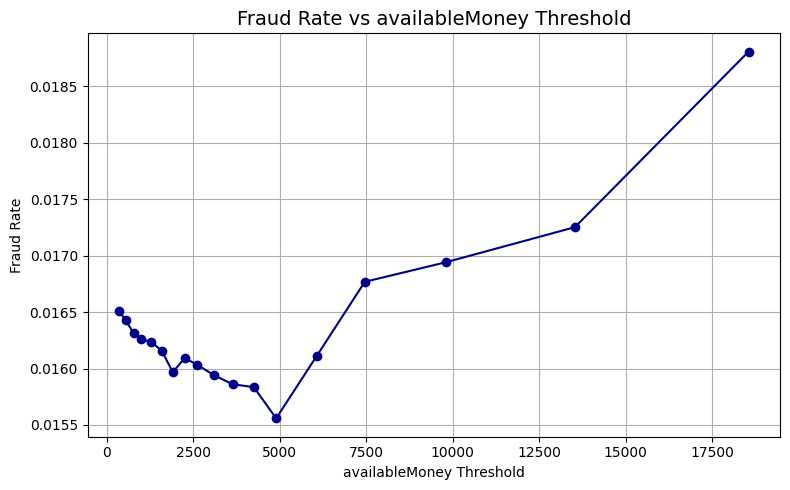

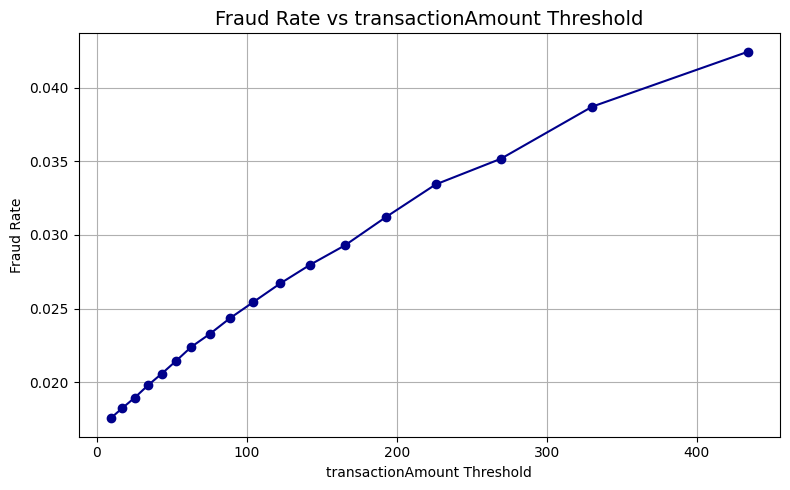

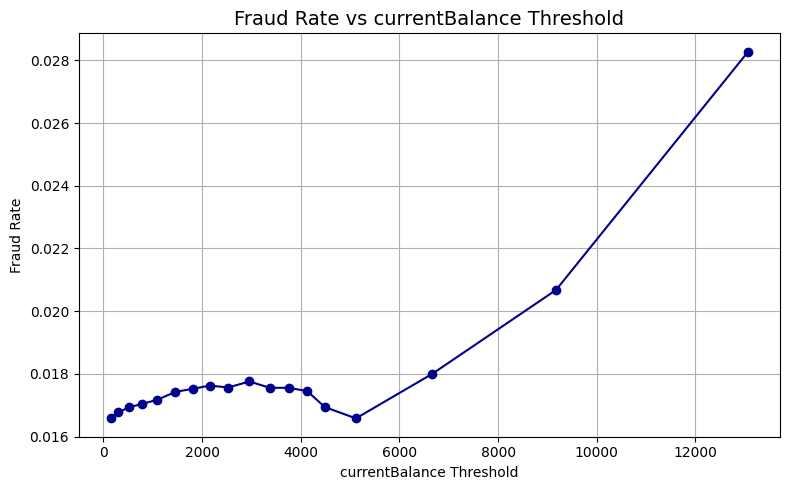

In [ ]:
import matplotlib.pyplot as plt

# Define columns to analyze
cols_to_check = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']

# Percentiles for thresholding
percentiles = list(range(10, 100, 5))  # 10% to 95% in 5% steps

# Loop through each feature
for col in cols_to_check:
    fraud_rates = []
    thresholds = []

    for p in percentiles:
        threshold = data[col].quantile(p / 100)
        fraud_rate = data[data[col] > threshold]['isFraud'].mean()

        thresholds.append(threshold)
        fraud_rates.append(fraud_rate)

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, fraud_rates, marker='o', linestyle='-', color='darkblue')
    plt.title(f'Fraud Rate vs {col} Threshold', fontsize=14)
    plt.xlabel(f'{col} Threshold')
    plt.ylabel('Fraud Rate')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Extracting date and time features for time based analysis:

In [ ]:
df_transactions = pd.DataFrame(data)

# Convert transactionDateTime to datetime
df_transactions['transactionDateTime'] = pd.to_datetime(df_transactions['transactionDateTime'])

# 1. Extract Time of Day (Hour)
df_transactions['transaction_hour'] = df_transactions['transactionDateTime'].dt.hour

# 2. Extract Transaction Date
df_transactions['transaction_date'] = df_transactions['transactionDateTime'].dt.date

# Display the DataFrame with new features
print(df_transactions)

      accountNumber  creditLimit  availableMoney transactionDateTime  \
0         737265056       5000.0         5000.00 2016-08-13 14:27:32   
1         737265056       5000.0         5000.00 2016-10-11 05:05:54   
2         737265056       5000.0         5000.00 2016-11-08 09:18:39   
3         737265056       5000.0         5000.00 2016-12-10 02:14:50   
4         830329091       5000.0         5000.00 2016-03-24 21:04:46   
...             ...          ...             ...                 ...   
13528     763888477       1000.0          619.09 2016-03-10 13:52:28   
13529     763888477       1000.0          292.00 2016-03-11 04:15:41   
13530     763888477       1000.0          612.67 2016-03-11 23:30:32   
13531     763888477       1000.0          496.88 2016-03-14 14:56:31   
13532     763888477       1000.0          409.83 2016-03-15 11:39:04   

       transactionAmount         merchantName acqCountry merchantCountryCode  \
0                  98.55                 Uber         U

From the TransactionDateTime feature,  extracted the transaction hour and transaction date. These components are crucial for detecting fraudulent activities that may occur during specific peak hours, durations, or days. By breaking down the timestamp into these elements,  aim is to identify temporal patterns associated with fraudulent behavior.

### 2.Data Wrangling Phase - Duplicate transactions :

You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

## Lets Explore Reverse transactions and see what patterns we find:

In [ ]:
#Reversed Transaction

reversed_transactions = df[df["transactionType"]=="REVERSAL"]
print("Number of reversed_transactions ", reversed_transactions.shape[0])
print("Total value of reversed_transactions ${}".format(round(sum(reversed_transactions.transactionAmount),2)))

Number of reversed_transactions  20303
Total value of reversed_transactions $2821792.5


A significant number of transactions (20,303) were reversed, indicating possible customer disputes or fraud detections.
The total monetary value of these reversals is substantial ($2.82M), which could impact business operations and profitability.
If this trend is recurring, it might warrant further investigation into the reasons behind these reversals.

Are certain merchants or accounts frequently involved in reversals?
Are specific transaction types or time periods more prone to reversals?

lets see if its the case.

### Top Merchants Frequently Involved in Reversals

Top Merchants Involved in Reversals:
merchantName
Lyft           692
Uber           689
alibaba.com    499
ebay.com       491
oldnavy.com    488
gap.com        484
amazon.com     477
staples.com    472
target.com     469
apple.com      460
Name: count, dtype: int64


/var/folders/3_/spjvw8t50td0f_vwwrr6rs900000gn/T/ipykernel_77872/1495711005.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_merchants.values, y=top_merchants.index, palette='viridis')


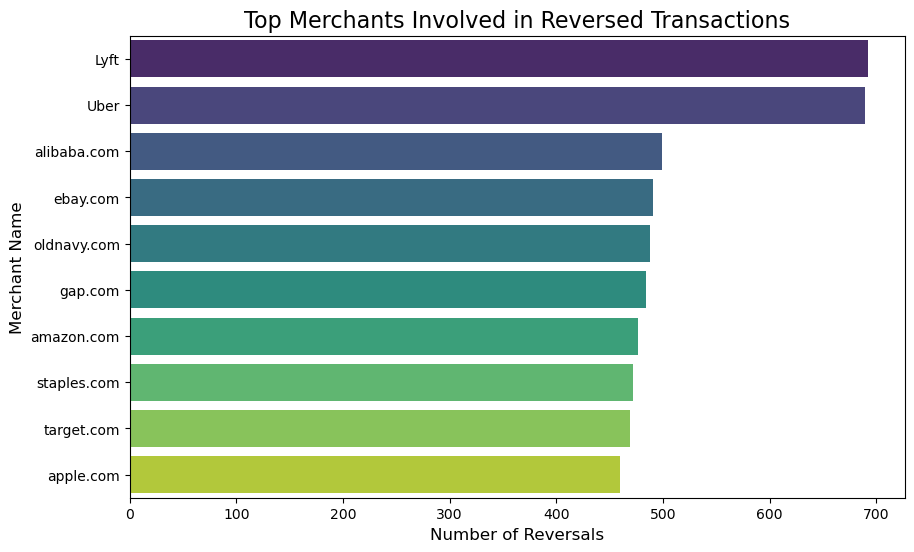

In [ ]:
top_merchants = reversed_transactions['merchantName'].value_counts().head(10)
print("Top Merchants Involved in Reversals:")
print(top_merchants)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top_merchants.values, y=top_merchants.index, palette='viridis')
plt.title('Top Merchants Involved in Reversed Transactions', fontsize=16)
plt.xlabel('Number of Reversals', fontsize=12)
plt.ylabel('Merchant Name', fontsize=12)
plt.show()

### Top Accounts Frequently Involved in Reversals

Top Accounts Involved in Reversals:
accountNumber
380680241    907
882815134    384
570884863    300
246251253    277
369308035    211
894938833    181
832842201    177
724518977    173
419709514    171
208319653    148
Name: count, dtype: int64


/var/folders/3_/spjvw8t50td0f_vwwrr6rs900000gn/T/ipykernel_77872/4184200333.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_accounts.values, y=top_accounts.index, palette='plasma')


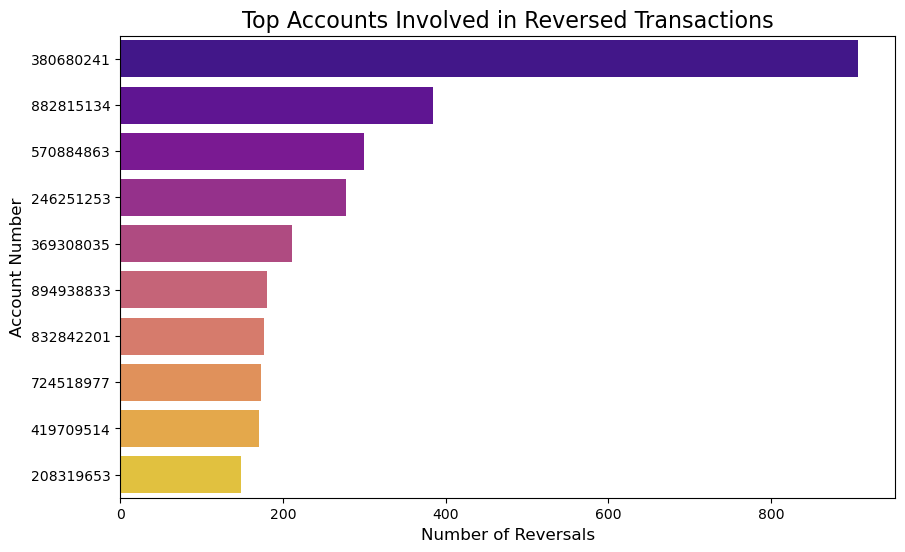

In [ ]:
top_accounts = reversed_transactions['accountNumber'].value_counts().head(10)
print("Top Accounts Involved in Reversals:")
print(top_accounts)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_accounts.values, y=top_accounts.index, palette='plasma')
plt.title('Top Accounts Involved in Reversed Transactions', fontsize=16)
plt.xlabel('Number of Reversals', fontsize=12)
plt.ylabel('Account Number', fontsize=12)
plt.show()

In [ ]:
#MultiSwipe Transaction
#Logic for a MultiSwipe transaction ==> accountNumber,date, merchantName and Hour should be same

multiswipe_transcations = pd.DataFrame(df.groupby(["accountNumber","transaction_date","merchantName","transaction_hour"]).head())
print("Number of multiswipe_transcations",df.shape[0] - multiswipe_transcations.shape[0])
print("Total Amount for Multiswipe Transaction ",sum(df.transactionAmount) - sum(multiswipe_transcations.transactionAmount),"$")

Number of multiswipe_transcations 6
Total Amount for Multiswipe Transaction  1044.109999999404 $


Only 6 transactions fall under the multi-swipe category, indicating that this is a relatively rare occurrence in the dataset.
The total monetary value associated with these transactions is $1,044.11, which is not a significant percentage of the overall transaction amounts. Hence, we can keep a hold on further analysis for multiswipe transactions.

### Visualization of Transaction Amounts

1.   List item
2.   List item



Fraudulent Transactions:
count     426.000000
mean      190.308427
std       164.558848
min         0.000000
25%        64.587500
50%       149.485000
75%       272.632500
max      1064.620000
Name: transactionAmount, dtype: float64

Non-Fraudulent Transactions:
count    25297.000000
mean       134.472013
std        147.059564
min          0.000000
25%         32.130000
50%         83.210000
75%        188.150000
max       1329.670000
Name: transactionAmount, dtype: float64


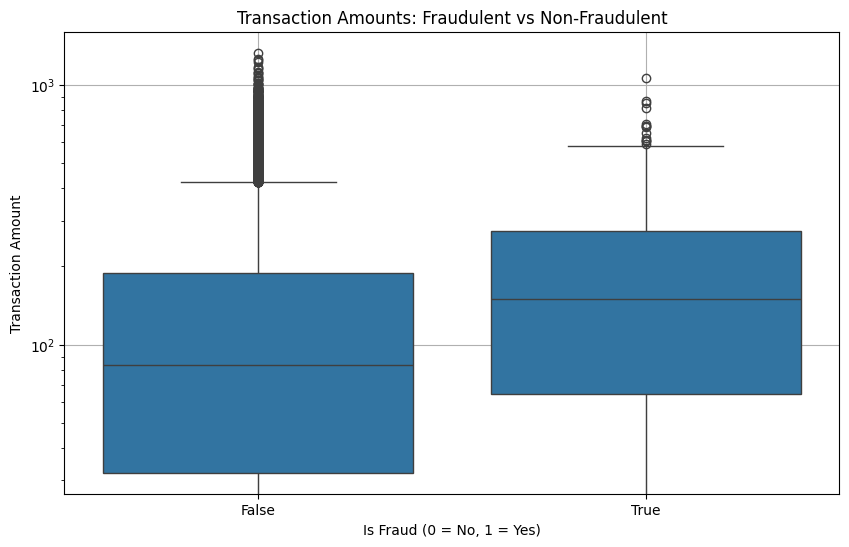

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic comparison
fraudulent = data[data['isFraud'] == 1]['transactionAmount']
non_fraudulent = data[data['isFraud'] == 0]['transactionAmount']

# 2. Summary statistics
print("Fraudulent Transactions:")
print(fraudulent.describe())
print("\nNon-Fraudulent Transactions:")
print(non_fraudulent.describe())

# 3. Boxplot to compare distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='transactionAmount', data=data)
plt.title('Transaction Amounts: Fraudulent vs Non-Fraudulent')
plt.xlabel('Is Fraud (0 = No, 1 = Yes)')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Use log scale if data is skewed
plt.grid(True)
plt.show()

Mean is significantly higher for fraudulent transactions (≈190 vs 134).

The 25th - 75th percentile range for fraud is [65 to 273], compared to [32 to 188] for normal transactions.
This tells us fraud is less likely in very small-value transactions.  

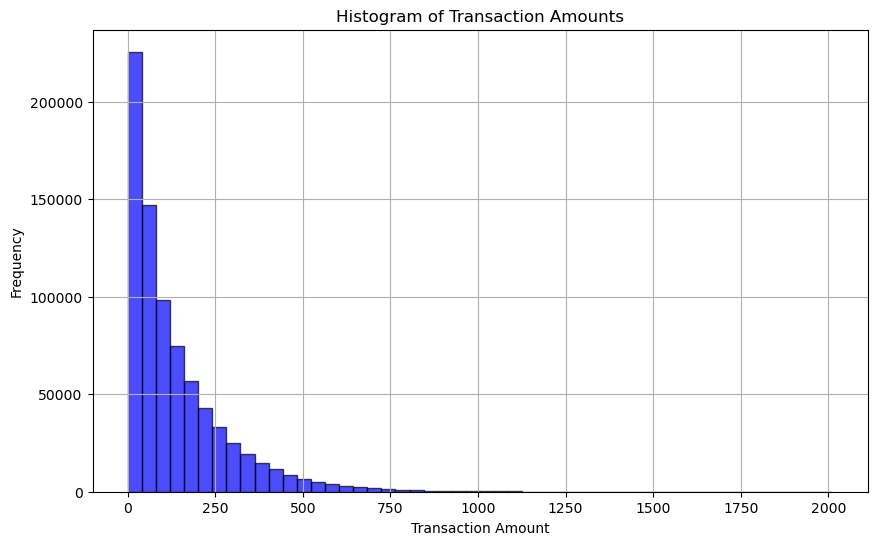

Transaction Amount Summary:
count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for transactionAmount
plt.figure(figsize=(10, 6))
plt.hist(df["transactionAmount"], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title("Histogram of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Statistical description of transactionAmount
transaction_stats = df["transactionAmount"].describe()
print("Transaction Amount Summary:")
print(transaction_stats)

The histogram above illustrates the distribution of transaction amounts and their frequency. The data shows that transaction peaks occur predominantly for amounts less than **250,** with a mean transaction value of **136.** Additionally, **75%** of users spend **191** or less on their transactions, indicating that the majority of users make transactions below **200**.

In [ ]:
# Remove the specified columns
columns_to_remove = ['cardLast4Digits', 'cardCVV', 'merchantCategoryCode','dateOfLastAddressChange', 'transactionDateTime', 'echoBuffer', 'enteredCVV','merchantCity', 'posConditionCode','currentExpDate', 'merchantState','merchantZip','posOnPremises','recurringAuthInd']
df_cleaned = df.drop(columns=columns_to_remove, errors='ignore')
df_cleaned

,accountNumber,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,accountOpenDate,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transaction_hour,transaction_date
0,737265056,5000.0,5000.00,98.55,Uber,US,US,02,2015-03-14,PURCHASE,0.00,False,False,False,14,2016-08-13
1,737265056,5000.0,5000.00,74.51,AMC #191138,US,US,09,2015-03-14,PURCHASE,0.00,True,False,False,5,2016-10-11
2,737265056,5000.0,5000.00,7.47,Play Store,US,US,09,2015-03-14,PURCHASE,0.00,False,False,False,9,2016-11-08
3,737265056,5000.0,5000.00,7.47,Play Store,US,US,09,2015-03-14,PURCHASE,0.00,False,False,False,2,2016-12-10
4,830329091,5000.0,5000.00,71.18,Tim Hortons #947751,US,US,02,2015-08-06,PURCHASE,0.00,True,False,False,21,2016-03-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,50000.0,48904.96,119.92,Lyft,US,US,90,2012-08-23,PURCHASE,1095.04,False,False,False,18,2016-12-22
786359,732852505,50000.0,48785.04,18.89,hulu.com,US,US,09,2012-08-23,PURCHASE,1214.96,False,False,False,16,2016-12-25
786360,732852505,50000.0,48766.15,49.43,Lyft,US,US,02,2012-08-23,PURCHASE,1233.85,False,False,False,15,2016-12-27
786361,732852505,50000.0,48716.72,49.89,walmart.com,US,US,09,2012-08-23,PURCHASE,1283.28,False,False,False,0,2016-12-29


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'transactionType']

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df_cleaned[col] = encoder.fit_transform(df_cleaned[col])

# Display the first few rows of the encoded data
df_cleaned

,accountNumber,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,accountOpenDate,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transaction_hour,transaction_date
0,737265056,5000.0,5000.00,98.55,2086,4,4,1,2015-03-14,2,0.00,False,False,False,14,2016-08-13
1,737265056,5000.0,5000.00,74.51,27,4,4,3,2015-03-14,2,0.00,True,False,False,5,2016-10-11
2,737265056,5000.0,5000.00,7.47,1305,4,4,3,2015-03-14,2,0.00,False,False,False,9,2016-11-08
3,737265056,5000.0,5000.00,7.47,1305,4,4,3,2015-03-14,2,0.00,False,False,False,2,2016-12-10
4,830329091,5000.0,5000.00,71.18,2084,4,4,1,2015-08-06,2,0.00,True,False,False,21,2016-03-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,50000.0,48904.96,119.92,1061,4,4,5,2012-08-23,2,1095.04,False,False,False,18,2016-12-22
786359,732852505,50000.0,48785.04,18.89,2479,4,4,3,2012-08-23,2,1214.96,False,False,False,16,2016-12-25
786360,732852505,50000.0,48766.15,49.43,1061,4,4,1,2012-08-23,2,1233.85,False,False,False,15,2016-12-27
786361,732852505,50000.0,48716.72,49.89,2487,4,4,3,2012-08-23,2,1283.28,False,False,False,0,2016-12-29


#### Converting all the variables to numeric format so we can incorporate them into our model:

In [ ]:
import pandas as pd

# Ensure transaction_date and accountOpenDate are in datetime format
df_cleaned['transaction_date'] = pd.to_datetime(df_cleaned['transaction_date'], errors='coerce')

# Extract features from transaction_date
df_cleaned['transaction_year'] = df_cleaned['transaction_date'].dt.year
df_cleaned['transaction_month'] = df_cleaned['transaction_date'].dt.month
df_cleaned['transaction_day'] = df_cleaned['transaction_date'].dt.day

# Drop transaction_date if no longer needed
df_cleaned.drop(['transaction_date'], axis=1, inplace=True)

# Verify that all remaining features are numeric
print(df_cleaned.dtypes)


accountNumber                object
creditLimit                 float64
availableMoney              float64
transactionAmount           float64
merchantName                  int64
acqCountry                    int64
merchantCountryCode           int64
posEntryMode                  int64
accountOpenDate              object
transactionType               int64
currentBalance              float64
cardPresent                    bool
expirationDateKeyInMatch       bool
isFraud                        bool
transaction_hour              int32
transaction_year              int32
transaction_month             int32
transaction_day               int32
dtype: object


In [ ]:
# Convert binary columns to 0 and 1
binary_columns = ['expirationDateKeyInMatch', 'isFraud', 'cardPresent']

for col in binary_columns:
    df_cleaned[col] = df_cleaned[col].astype(int)

df_cleaned = df_cleaned.drop(columns=['accountOpenDate', 'transaction_date'], errors='ignore')

# Display the first few rows of the updated data
print(df_cleaned.head())

  accountNumber  creditLimit  availableMoney  transactionAmount  merchantName  \
0     737265056       5000.0          5000.0              98.55          2086   
1     737265056       5000.0          5000.0              74.51            27   
2     737265056       5000.0          5000.0               7.47          1305   
3     737265056       5000.0          5000.0               7.47          1305   
4     830329091       5000.0          5000.0              71.18          2084   

   acqCountry  merchantCountryCode  posEntryMode  transactionType  \
0           4                    4             1                2   
1           4                    4             3                2   
2           4                    4             3                2   
3           4                    4             3                2   
4           4                    4             1                2   

   currentBalance  cardPresent  expirationDateKeyInMatch  isFraud  \
0             0.0            

### 3.Model Developement and Evaluation Phase:

### Implementing Logistic Regression Model

Model Accuracy: 0.6830

Confusion Matrix:
 [[105919  48861]
 [   988   1505]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.68      0.81    154780
           1       0.03      0.60      0.06      2493

    accuracy                           0.68    157273
   macro avg       0.51      0.64      0.43    157273
weighted avg       0.98      0.68      0.80    157273



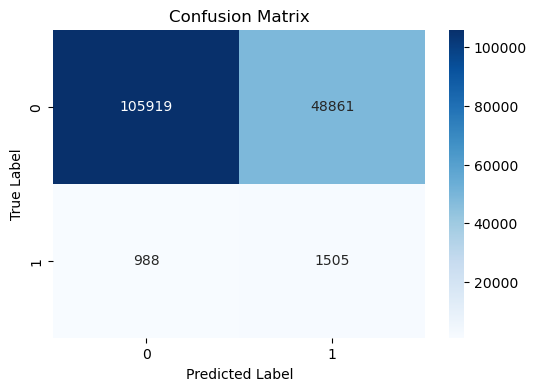

In [ ]:
# Import necessary libraries
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features (X) and target variable (y)
X = df_cleaned.drop(columns=['isFraud'])  # Replace 'target_column' with actual target variable
y = df_cleaned['isFraud']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (Normalization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train Logistic Regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

# Visualization of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### Implementing Random Forest Model for Fraudulent transactions prediction

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

X = df_cleaned.drop(columns=['isFraud'])
y = df_cleaned['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, class_weight='balanced')

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:")
roc_auc = roc_auc_score(y_test, y_proba)
print(roc_auc)


Confusion Matrix:
[[182884  49300]
 [  1416   2309]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.79      0.88    232184
           1       0.04      0.62      0.08      3725

    accuracy                           0.79    235909
   macro avg       0.52      0.70      0.48    235909
weighted avg       0.98      0.79      0.87    235909


ROC-AUC Score:
0.7754739067164274


-  True Negatives (TN): 182884
The Model correctly predicted 182884 transactions as non-fraudulent (actual non-fraud).

-  False Positives (FP): 49300
The model incorrectly predicted 49300 transactions as fraudulent (actual non-fraud).

-  **False Negatives (FN): 1416**
**The model failed to detect 1416 fraudulent transactions (actual fraud) . i.e missing fraudulent transaction can lead to risk hence we need to work on minizimg them.**

-  True Positives (TP): 2309
The model correctly identified 2309 transactions as fraudulent (actual fraud).

The model predicts many non-fraudulent transactions as fraudulent, which might lead to customer dissatisfaction due to unnecessary alerts or blocks.

#### The model detects about 62% of fraudulent transactions, which is decent but can be improved and only 4 % of transactions predicted as fraud are actually fraudulent, indicating the model struggles with accurately identifying fraud cases.

####  A high accuracy (77.5%) can be misleading in imbalanced datasets, as the majority class (non-fraud) dominates.

Further, I am going to use few strategies to maintain balance between precision recall trae off and to balance the dataset.

First, I will Adjust the Decision Threshold, by Lowering or increasing the threshold we may help balance precision and recall based on business needs. Also, for Handling Class Imbalance, I will implement SMOTE whcih will generaste synthetic sampels of minority class. .

Lets see if using these techniques will help us create a balance and how it further impacts our decision making.

####  ROC Curve

Important here is precision and recall of class 1 Which is minoriy class. Also reducing false negative and improving the recall of class 1. Also, by asjusting thresold to lowe, we can improve the recall of class 1 using ROC Auc curve.

Missing a fraud case is much more critical and crucial then identifying non fraudlent as fraudulent.

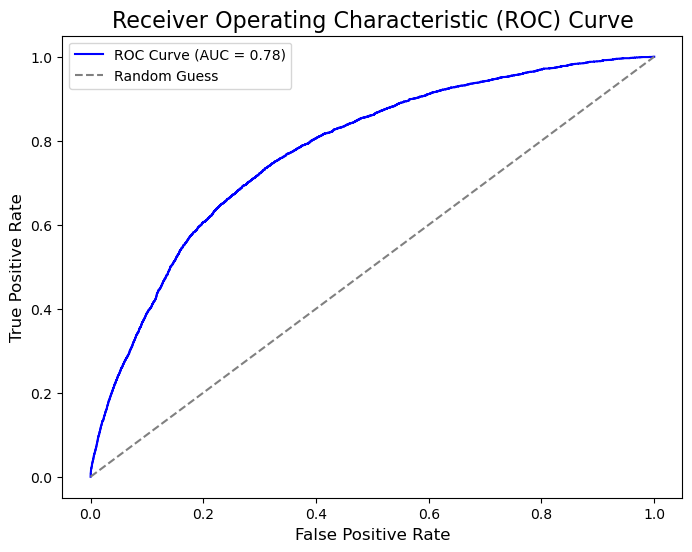

NameError: name 'y_prob' is not defined

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend()
plt.show()


# Get FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate Youden's J statistic
youden_j = tpr - fpr

# Find the index of the best threshold
best_threshold_index = youden_j.argmax()
best_threshold = thresholds[best_threshold_index]

print("Best Threshold:", best_threshold)


In [ ]:

X = df_cleaned.drop(columns=['isFraud'])
y = df_cleaned['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, class_weight='balanced')

# Train the model
rf_model.fit(X_train, y_train)

# Predict probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Adjust threshold
threshold = 0.43  # Set a new threshold
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Evaluate metrics
print("Confusion Matrix with Adjusted Threshold:")
print(confusion_matrix(y_test, y_pred_adjusted))

print("\nClassification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))

Confusion Matrix with Adjusted Threshold:
[[159973  72211]
 [   987   2738]]

Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.99      0.69      0.81    232184
           1       0.04      0.74      0.07      3725

    accuracy                           0.69    235909
   macro avg       0.52      0.71      0.44    235909
weighted avg       0.98      0.69      0.80    235909



We have adjusted our thresold value to *0.43* by finding the most optimal thresold value using youden statistics. As a result Recall of Class 1 (minority class) increased to 74% from 62%. Indicating that model correcly predicts 74% of fraudulent transactions, which indicates a goo caputure and we can further use this model in real time.   

In [ ]:
mlflow.end_run()

#### Applying SMOTE and using MLFLOW for model tracking and Management

In [ ]:
import mlflow
import mlflow.sklearn
from imblearn.over_sampling import SMOTE

# Start MLflow experiment
mlflow.start_run()

# Separate features and target
X = df_cleaned.drop("isFraud", axis=1)
y = df_cleaned["isFraud"]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split on the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Log the class distribution after SMOTE
mlflow.log_param("class_distribution_after_smote", str(y_resampled.value_counts()))

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Log model parameters
mlflow.log_param("model", "RandomForestClassifier")
mlflow.log_param("random_state", 42)

# Predict on the test set
y_pred = model.predict(X_test)

# Log metrics (Confusion Matrix and Classification Report)
conf_matrix = confusion_matrix(y_test, y_pred)
mlflow.log_metric("TN", conf_matrix[0, 0])
mlflow.log_metric("FP", conf_matrix[0, 1])
mlflow.log_metric("FN", conf_matrix[1, 0])
mlflow.log_metric("TP", conf_matrix[1, 1])

# Log classification report metrics
report = classification_report(y_test, y_pred, output_dict=True)
for label, metrics in report.items():
    if label != "accuracy":
        mlflow.log_metric(f"{label}_precision", metrics["precision"])
        mlflow.log_metric(f"{label}_recall", metrics["recall"])
        mlflow.log_metric(f"{label}_f1-score", metrics["f1-score"])

# Log the trained model
mlflow.sklearn.log_model(model, "model")


# Print the metrics and classification report
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



2025/04/22 20:48:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Confusion Matrix:
[[219252  12572]
 [  4010 228534]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96    231824
           1       0.95      0.98      0.96    232544

    accuracy                           0.96    464368
   macro avg       0.96      0.96      0.96    464368
weighted avg       0.96      0.96      0.96    464368



In [ ]:
**From Above Classification report and metrics, we can say that:**


After applying SMOTE, the class distribution is balanced, which is crucial for improving the model's ability to detect fraudulent transactions without being biased toward the majority class (non-fraudulent).

**High Performance:** The model has strong performance, with high precision, recall, and F1-score for both classes (non-fraudulent and fraudulent). This indicates that the model is doing well in correctly identifying both fraudulent and non-fraudulent transactions.

**Low False Positives and False Negatives:**
False positives (non-fraudulent transactions predicted as fraudulent) are **12,572,** which is relatively low considering the large number of total non-fraudulent transactions.

False negatives (fraudulent transactions predicted as non-fraudulent) are also low, with only **4,010,** which indicates that the model is not missing many fraudulent transactions.

**Business Implications:**

**Fraud Detection:** The model is highly effective at detecting fraudulent transactions, with an **98%** recall for fraudulent transactions, which means it catches nearly all instances of fraud.

**Operational Impact:** With a high precision for both classes, the business can be confident in its predictions, reducing manual investigation time for non-fraudulent transactions while still catching most fraudulent activities.

### Which models works better?

The logistic Regression Model shows accuracy of 68% which signifies that model needs improvement in terms of classifying class 0 and Class 1. For further analysis, I have implemented Random Forest due to its ability to handle categorical and numerical data, and effectiveness in capturing non-linear relationships.
Also, It provides great tool of feature importance, which helps understand the key drivers of fradulent transactions and would help us to implement potential solutions and minimize the risk.

## lets see which features are contributing most towards fraudulent activities

In [ ]:
# Feature Importance (optional)
feature_importance = rf_model.feature_importances_
for name, importance in zip(X.columns, feature_importance):
    print(f"{name}: {importance:.4f}")

accountNumber: 0.0936
creditLimit: 0.0306
availableMoney: 0.0451
transactionAmount: 0.3248
merchantName: 0.1263
acqCountry: 0.0027
merchantCountryCode: 0.0042
posEntryMode: 0.1489
transactionType: 0.0080
currentBalance: 0.0518
cardPresent: 0.0975
expirationDateKeyInMatch: 0.0001
transaction_hour: 0.0232
transaction_year: 0.0000
transaction_month: 0.0192
transaction_day: 0.0241



### Questions I Have?
Are there specific thresholds or business rules for flagging transactions as fraudulent beyond model predictions?
How will the model predictions be used operationally? (e.g., real-time fraud detection or periodic reporting)
                                              
### What I Would Do Next With More Time?

**I would have used more feautures like payment Type, ProsentryMode and different time formarts to see if there are fraudulent actities for specfic times or days.**
**Hyperparameter Tuning**
**Perform grid search or randomized search to optimize model parameters for better performance**
**Use unsupervised learning methods like clustering to detect anomalous transactions**



### Conclusion and Recommendations

From our Exploratory Data Analysis, Model Performance and Feature Importance we have below insights and Recommendations for Business.

-  Account number, PostEntry Mode and MerchantName are them most crucial features which are prone towards fraudelent transactions.

-  If we dig deeper from our earlier visualisation we can see that Account number 380680241 have had  907 reverse transactions and (#882815134) had 384 reverse trasactions. These two accounts needs further investigation in terms of time period and freuquency of reversal within weeks or days.

-  Also, the merchants like Lyft with  692, Uber with 689, alibaba.com with 499 and ebay.com with 491 as topmost merchant which usually are Ecommerce platform. ridesharing services and Online trading platform have most of transaction reversal, which requires further investigation and monitoring.

**Strategies and Recommendations:**
-  Implement automated flags for accounts with high reversal frequencies within a specified time window and prioritize these accounts for manual review or additional identity verification steps. Also, Analyze transaction patterns, frequency, and timing for flagged accounts to detect anomalies.

-  Develop a risk score for merchants based on the frequency of reversals, transaction volume, and customer complaints and Prioritize high-risk merchants for audits or closer monitoring. Also, Engage with high-risk merchants to understand why reversals occur (e.g., customer dissatisfaction, system errors, or fraud).

-  Set limits for high-risk merchants (e.g., cap the transaction amount or restrict bulk transactions).


## **THANKYOU**